In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt
from matplotlib import cm
import colorcet as cc

#This are my libraries
import nlo
import pulses
import materials
import waveguides

#Larger font for plots
plt.rcParams.update({'font.size': 18})

In [2]:
from scipy.constants import pi, c, epsilon_0
π = pi
nm = 1e-9
um = 1e-6
mm = 1e-3
ps = 1e-12
fs = 1e-15
GHz = 1e9
THz = 1e12
pJ = 1e-12
mW = 1e-3

In [3]:
λp = 1064*nm #Pump wavelength
fp = c/λp
ωp = 2 * π * fp

#Signal and idler
λs = np.arange(1.5*um, 3.0*um, 10*nm)
fs = c/λs
fi = fp - fs
λi = c/fi

#Nonlinearity
X0 = 1.1e-12

#Waveguide
width = 1850*nm
hLN = 700*nm
hetch = 350*nm

wg = waveguides.waveguide(w_top=width, h_ridge=hLN, h_slab=hLN-hetch)

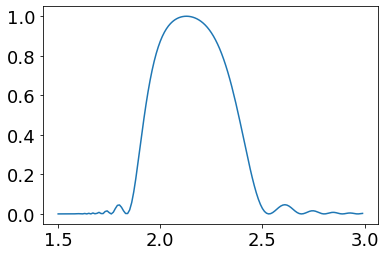

In [4]:
#Poling period
Λg = 5.21*um
Kg = 2*pi/Λg

Ppump = 150*mW
L = 4*mm

Δk = np.zeros_like(fs)
Γ2 = np.zeros_like(fs)
for kf in range(fs.size):
    ωs = 2 * π * fs[kf]
    ωi = ωp - ωs
    
    n_p = wg.neff( λp )
    n_s = wg.neff( λs[kf] )
    n_i = wg.neff( λi[kf] )
    
    #Phase mismatch
    kp = ωp * n_p / c
    ks = ωs * n_s / c
    ki = ωi * n_i / c
    Δk[kf] = kp - ks - ki - Kg
    
    #Nonlinear factors
    κs = ωs * X0 / 4
    κi = ωi * X0 / 4
    Γ2[kf] = κs * κi * Ppump
    
g = np.sqrt( Γ2 - (Δk/2)**2 + 0*1j )
G = Γ2 * L**2 * (np.sinh(g*L))**2 / (g*L)**2
Gmax = np.amax(np.abs(G))
Grel = G / Gmax

plt.plot(λs/um, np.abs(Grel))

In [5]:
def gain_bw():
    Δk = np.zeros_like(fs)
    Γ2 = np.zeros_like(fs)
    for kf in range(fs.size):
        ωs = 2 * π * fs[kf]
        ωi = ωp - ωs

        n_p = wg.neff( λp )
        n_s = wg.neff( λs[kf] )
        n_i = wg.neff( λi[kf] )

        #Phase mismatch
        kp = ωp * n_p / c
        ks = ωs * n_s / c
        ki = ωi * n_i / c
        Δk[kf] = kp - ks - ki - Kg

        #Nonlinear factors
        κs = ωs * X0 / 4
        κi = ωi * X0 / 4
        Γ2[kf] = κs * κi * Ppump

    g = np.sqrt( Γ2 - (Δk/2)**2 + 0*1j )
    G = Γ2 * L**2 * (np.sinh(g*L))**2 / (g*L)**2

    return G

Text(0, 0.5, 'Parametric Gain')

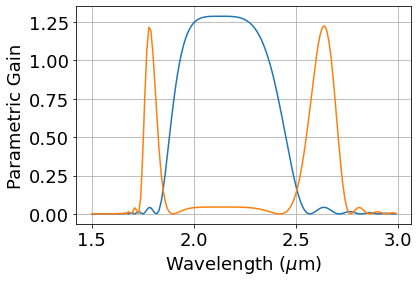

In [32]:
# poling_sweep = np.arange(5, 5.2, 0.02)*um
# poling_sweep = np.array([5.19, 5.20, 5.21, 5.22])*um
# poling_sweep = np.array([5.21-2/1000, 5.21, 5.21+2/1000])*um

poling_sweep = np.array([5.211, 5.211+10/1000])*um

for k in range(poling_sweep.size):

    #Poling period
    Λg = poling_sweep[k]
    Kg = 2*pi/Λg

    Ppump = 1
    L = 4*mm

    G = gain_bw()
    Gmax = np.amax(np.abs(G))
    Grel = G / Gmax
    plt.plot(λs/um, np.abs(G))
plt.grid(True)
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Parametric Gain')

Bandwidth = 420.0 nm = 27.5 THz


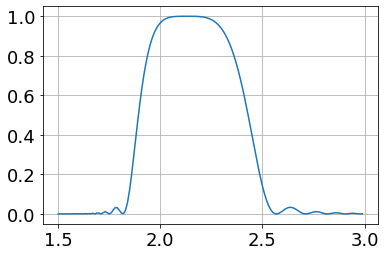

In [28]:
plt.plot(λs/um, np.abs(Grel))
plt.grid(True)
idx1 = np.argsort(np.abs(Grel-0.8))[0]
idx2 = np.argsort(np.abs(Grel-0.8))[1]
BWλ = λs[idx1] - λs[idx2]
BW = c/λs[idx2] - c/λs[idx1]
print('Bandwidth = %0.1f nm = %0.1f THz' %(BWλ/nm, BW/THz) )